In [2]:
import pandas as pd

In [3]:
house_prices_training_data = pd.read_csv("train.csv")
house_prices_test_data = pd.read_csv("test.csv")

features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',\
            'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', \
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

y = house_prices_training_data['SalePrice']
X = house_prices_training_data[features]

/home/vane/conda/envs/datsci/lib/python3.13/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


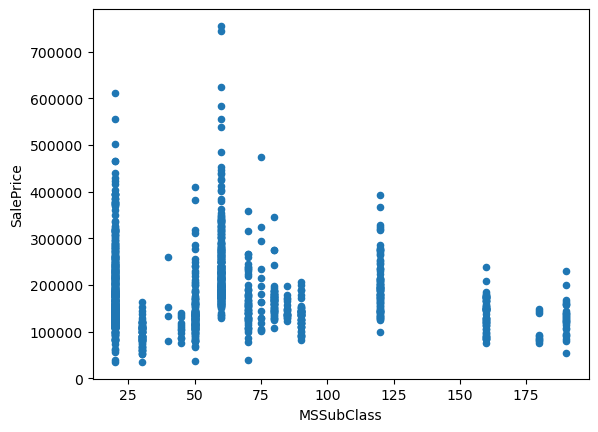

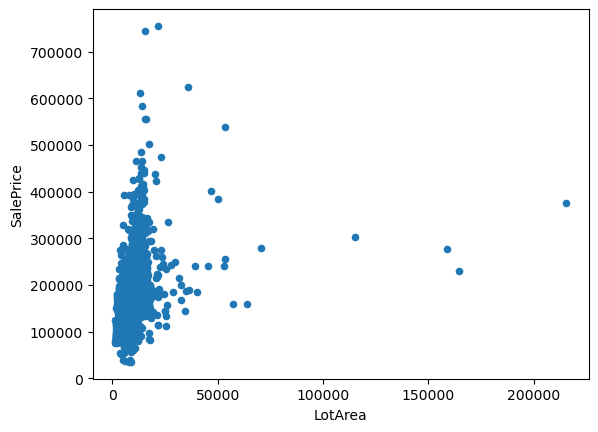

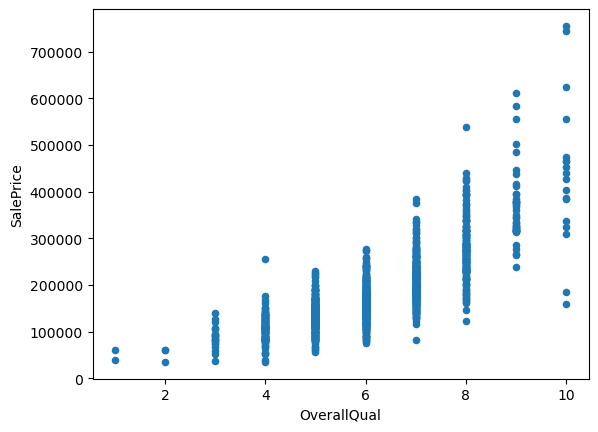

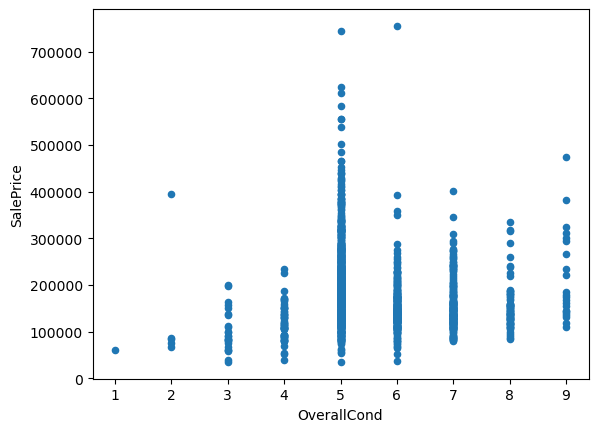

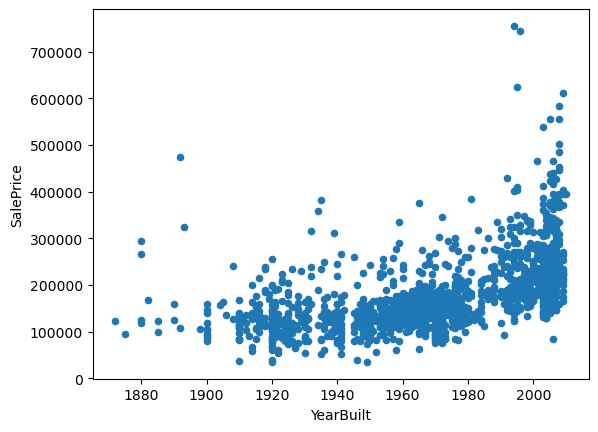

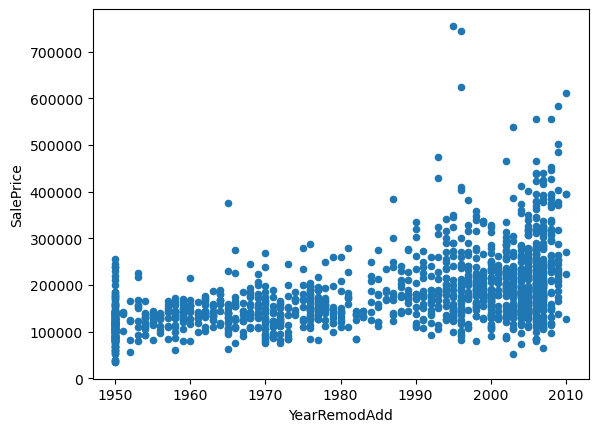

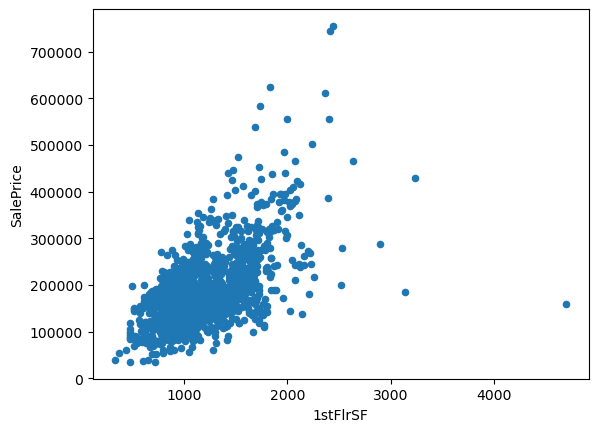

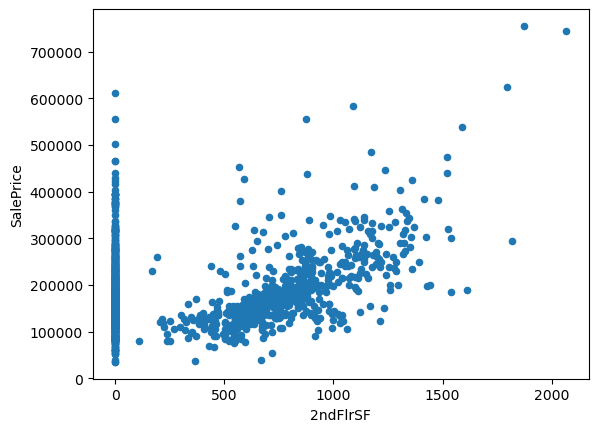

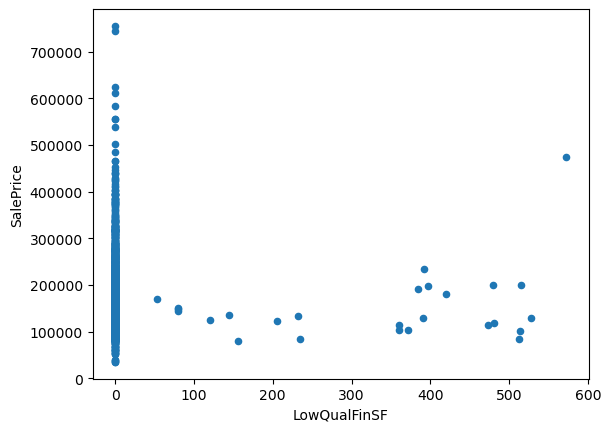

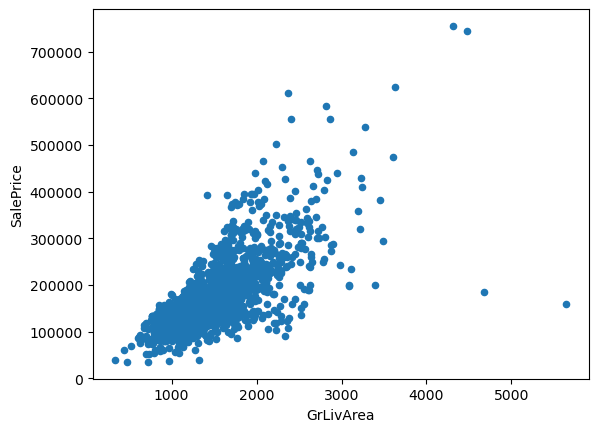

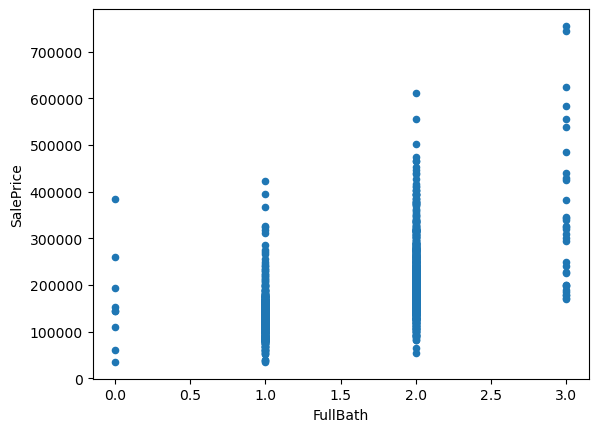

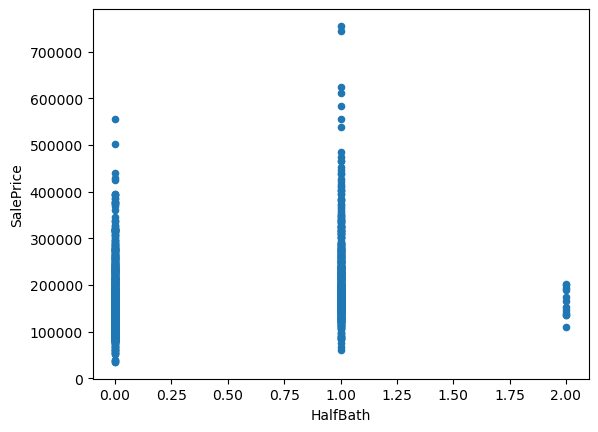

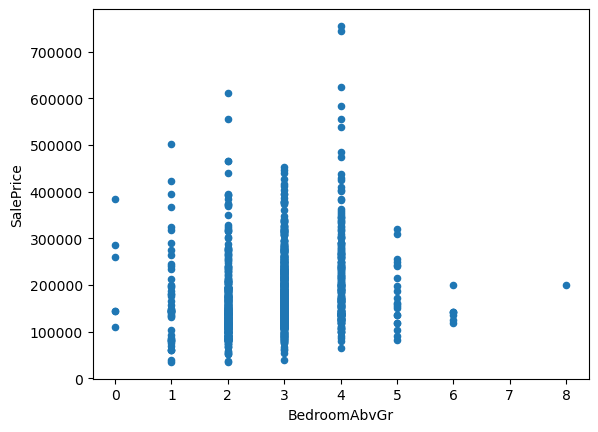

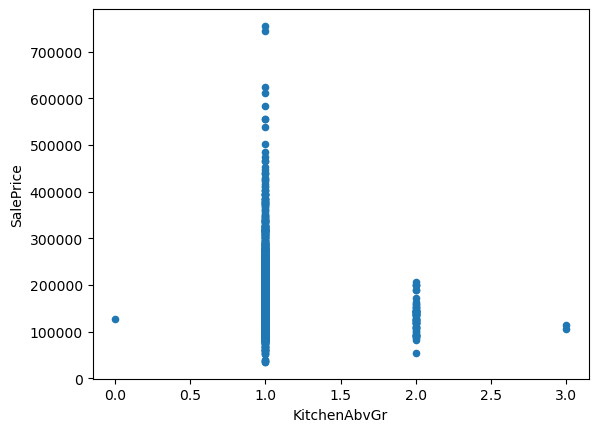

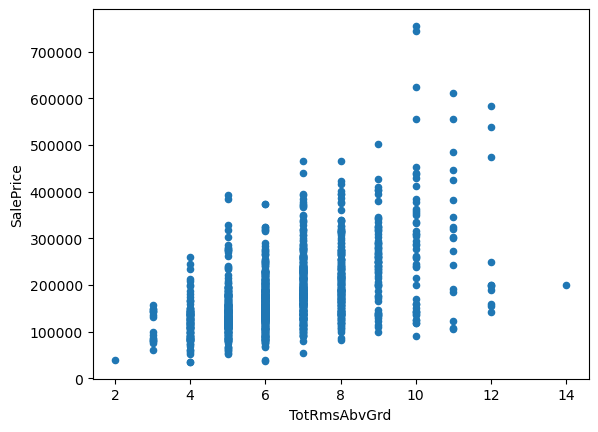

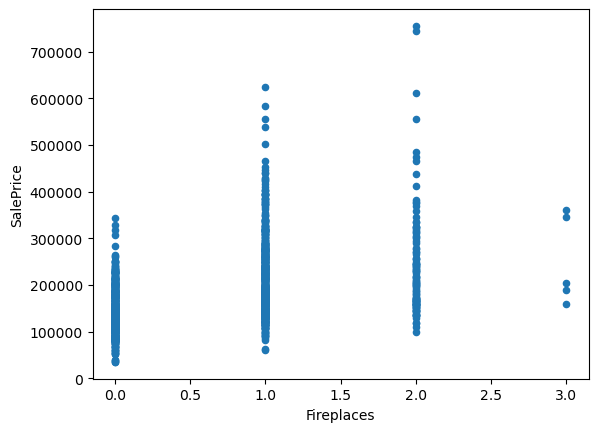

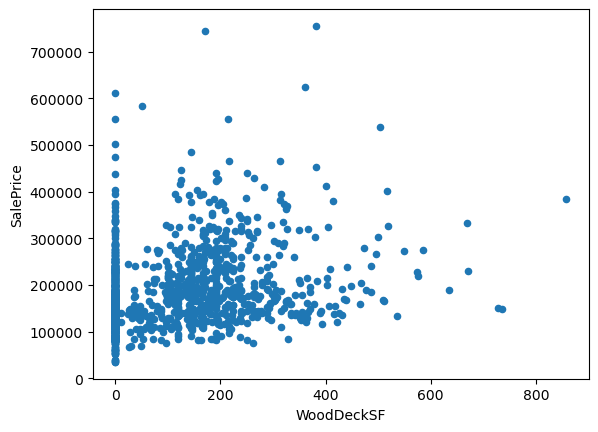

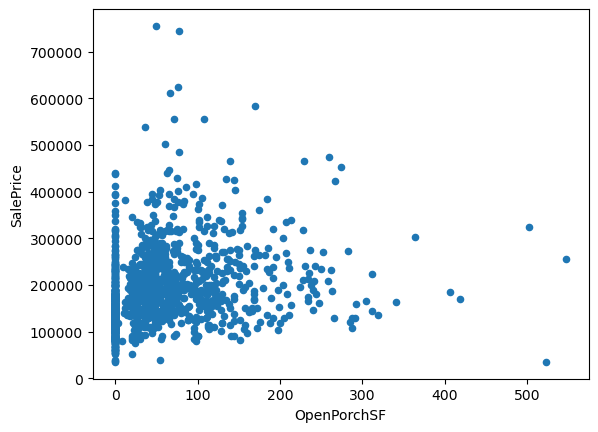

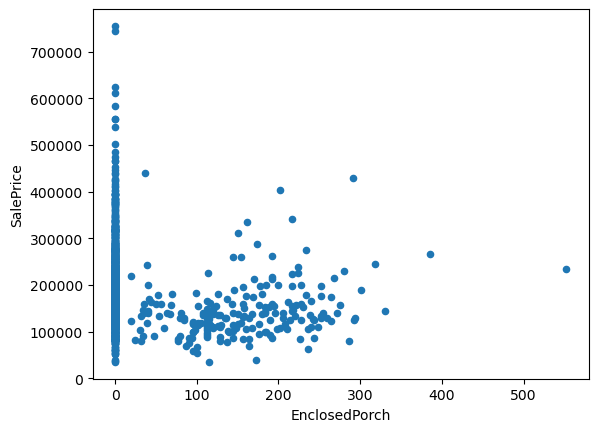

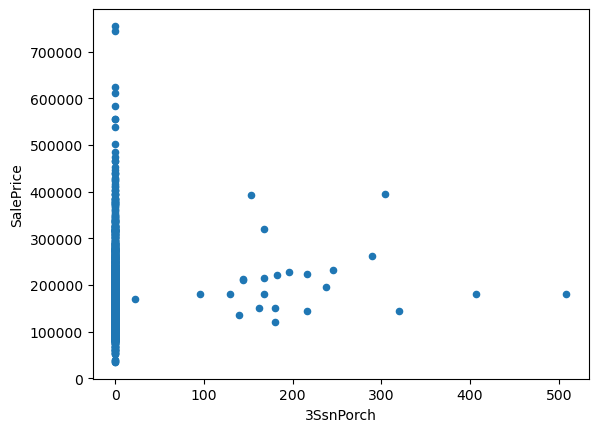

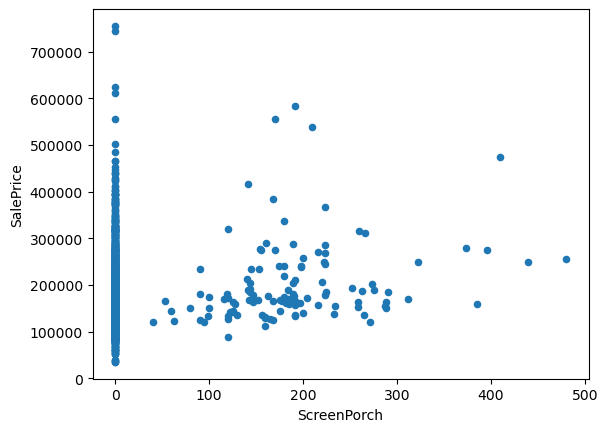

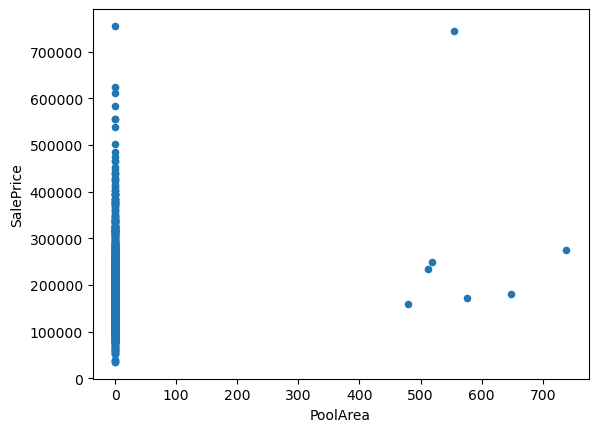

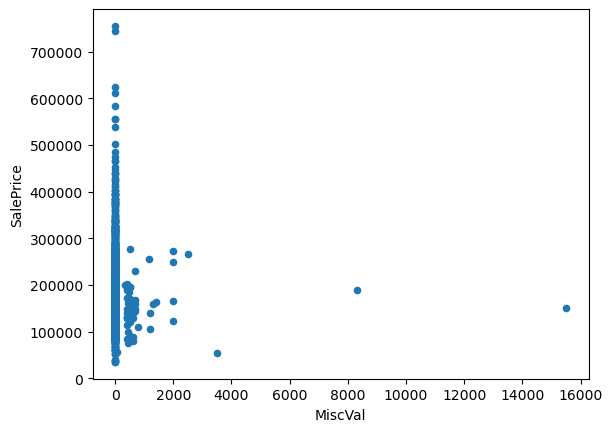

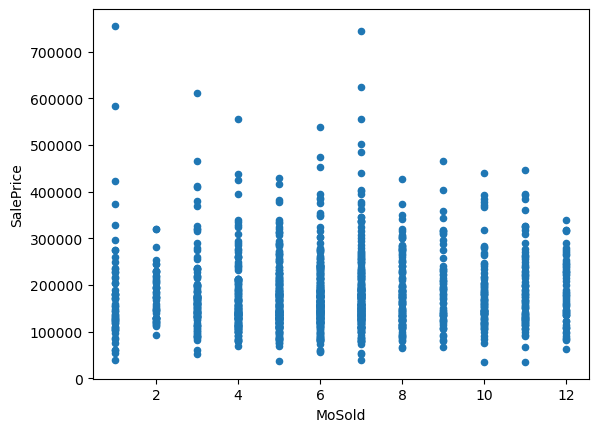

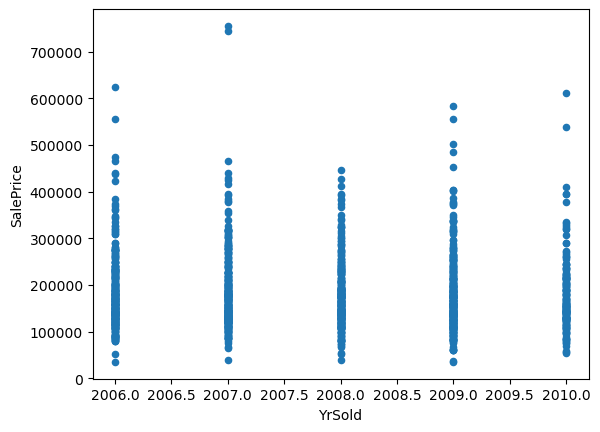

In [5]:
for column in features:
    pd.DataFrame({column: house_prices_training_data[column], 'SalePrice': house_prices_training_data['SalePrice']}).plot(x=column, y='SalePrice', kind='scatter')

In [ ]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_log_error
model = RandomForestRegressor(random_state=1)
model.fit(train_X, train_y)
prediction = model.predict(val_X)
print(root_mean_squared_log_error(val_y, prediction))

In [6]:
full_model = RandomForestRegressor(random_state=1)
test_X = house_prices_test_data.drop(['Id'], axis=1)
cleaner(test_X)
model.fit(X, y)
prediction = model.predict(test_X)
output = pd.DataFrame({'Id': house_prices_test_data.Id, 'SalePrice': prediction})
output.to_csv('Submission.csv', index=False)